In [35]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import matplotlib.pyplot as plt

In [36]:
data_set = pd.read_csv('/content/drive/MyDrive/hw1/Disease_symptom_and_patient_profile_dataset.csv')    #read table
data_set.head(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative


In [37]:
label_encoder = LabelEncoder()                                               # changing names to values  0,1,2,...
data_set['Fever'] = label_encoder.fit_transform(data_set['Fever'])

label_encoder = LabelEncoder()
data_set['Cough'] = label_encoder.fit_transform(data_set['Cough'])

label_encoder = LabelEncoder()
data_set['Fatigue'] = label_encoder.fit_transform(data_set['Fatigue'])

label_encoder = LabelEncoder()
data_set['Difficulty Breathing'] = label_encoder.fit_transform(data_set['Difficulty Breathing'])

label_encoder = LabelEncoder()
data_set['Gender'] = label_encoder.fit_transform(data_set['Gender'])

label_encoder = LabelEncoder()
data_set['Blood Pressure'] = label_encoder.fit_transform(data_set['Blood Pressure'])

label_encoder = LabelEncoder()
data_set['Cholesterol Level'] = label_encoder.fit_transform(data_set['Cholesterol Level'])

data_set.head(5)


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,1,0,1,1,19,0,1,2,Positive
1,Common Cold,0,1,1,0,25,0,2,2,Negative
2,Eczema,0,1,1,0,25,0,2,2,Negative
3,Asthma,1,1,0,1,25,1,2,2,Positive
4,Asthma,1,1,0,1,25,1,2,2,Positive


In [38]:
onehot = OneHotEncoder(sparse=False)     # creat onehotencoder we want array not sparse matrix
disease = onehot.fit_transform(data_set[['Disease']])  #convert disease column to onehot
disease_column = pd.DataFrame(disease, columns=onehot.get_feature_names_out(['Disease'])) #create new columns from name of diseases
data_set = data_set.drop('Disease', axis=1)   #remove the disease column     #axis -> column  labels - > row
data_set = pd.concat([disease_column, data_set], axis=1)  #add new columns to the table


data_set.head(5)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Disease_Acne,Disease_Allergic Rhinitis,Disease_Alzheimer's Disease,Disease_Anemia,Disease_Anxiety Disorders,Disease_Appendicitis,Disease_Asthma,Disease_Atherosclerosis,Disease_Autism Spectrum Disorder (ASD),Disease_Bipolar Disorder,...,Disease_Zika Virus,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,0,1,1,19,0,1,2,Positive
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,1,0,25,0,2,2,Negative
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,1,0,25,0,2,2,Negative
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1,1,0,1,25,1,2,2,Positive
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1,1,0,1,25,1,2,2,Positive


In [43]:
x = data_set.iloc[:,:-1]   #all inputs except last column(predict value)
y = data_set.iloc[:,-1]    #all rows in last column(predict value)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)  #split data_set for learning

In [44]:
def knn(x_train, y_train, x_test, k=5):
    distances = [np.linalg.norm(np.array(x) - np.array(x_test)) for x in x_train.values]   #count norm
    k_indices = np.argsort(distances)[:k]                           #find k-best
    k_nearest_labels = [y_train.iloc[i] for i in k_indices]         #labels of k-best

    most_common = Counter(k_nearest_labels).most_common(1)          #find more common
    return most_common[0][0]

y_pred = []
for _, x in x_test.iterrows():
    prediction = knn(x_train, y_train, x)             #do knn for each row  and use x_test
    y_pred.append(prediction)


In [45]:
accuracy = accuracy_score(y_test, y_pred)         #find accuracy
print(accuracy)

0.8571428571428571


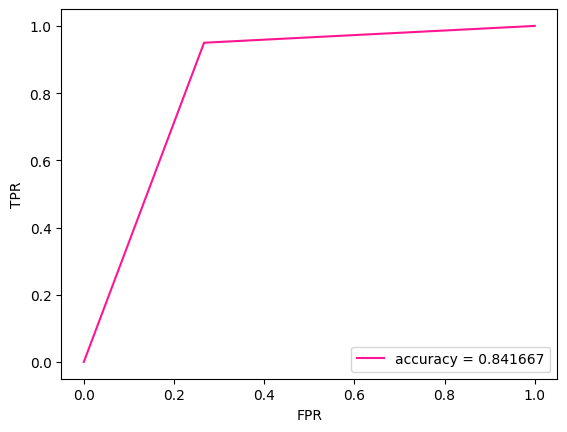

In [50]:
y_test = label_encoder.fit_transform(y_test)
y_pred = label_encoder.fit_transform(y_pred)      #convert targets from their class to numerical

fpr, tpr, threshholds = roc_curve(y_test, y_pred)  #return arrays of fpr , tpr
roc_auc = auc(fpr, tpr)  #area under plot


plt.plot(fpr, tpr, color='deeppink',  label='accuracy = %f' % roc_auc)
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend(loc="lower right")
plt.show()